Predict the Success of Bank Telemarketing: Decision Support Systems

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [9]:
data = pd.read_csv('bank-additional-full.csv',sep =';')

In [10]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Feature Engineering

Text(0.5, 1.0, 'Distribution of Output variable (Subscribed - no/yes)')

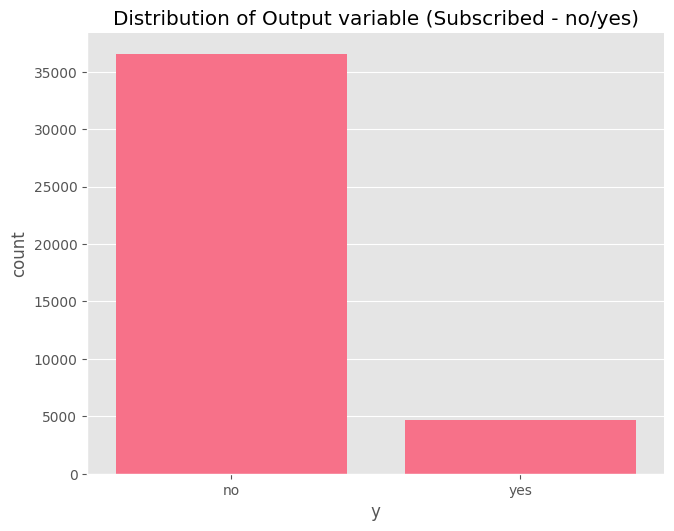

In [12]:
sns.set_palette("husl",2)
sns.FacetGrid(data, hue="y", height=5,aspect = 1.3)
sns.countplot(x="y", data=data,saturation=1).set_title("Distribution of Output variable (Subscribed - no/yes)")

Observe that the dataset is highly skewed towards the 'no' class. So we need to do some balancing of classes in our machine learning algorithms.

## Bank client basic data :

### `age` variable

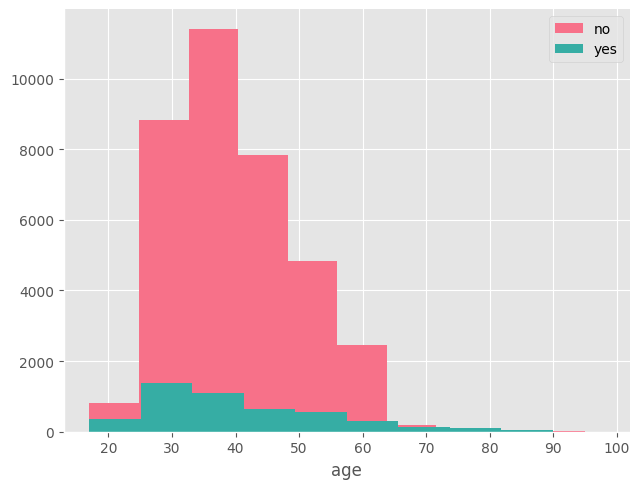

In [13]:
g = sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
g.map(plt.hist, "age")
plt.legend()

the term deposit scheme by the Bank is popular among the young age group. This would mean age variable is important for learning.

### `job` , `education` and `marital` variables

Text(0.5, 1.0, 'marital status distribution')

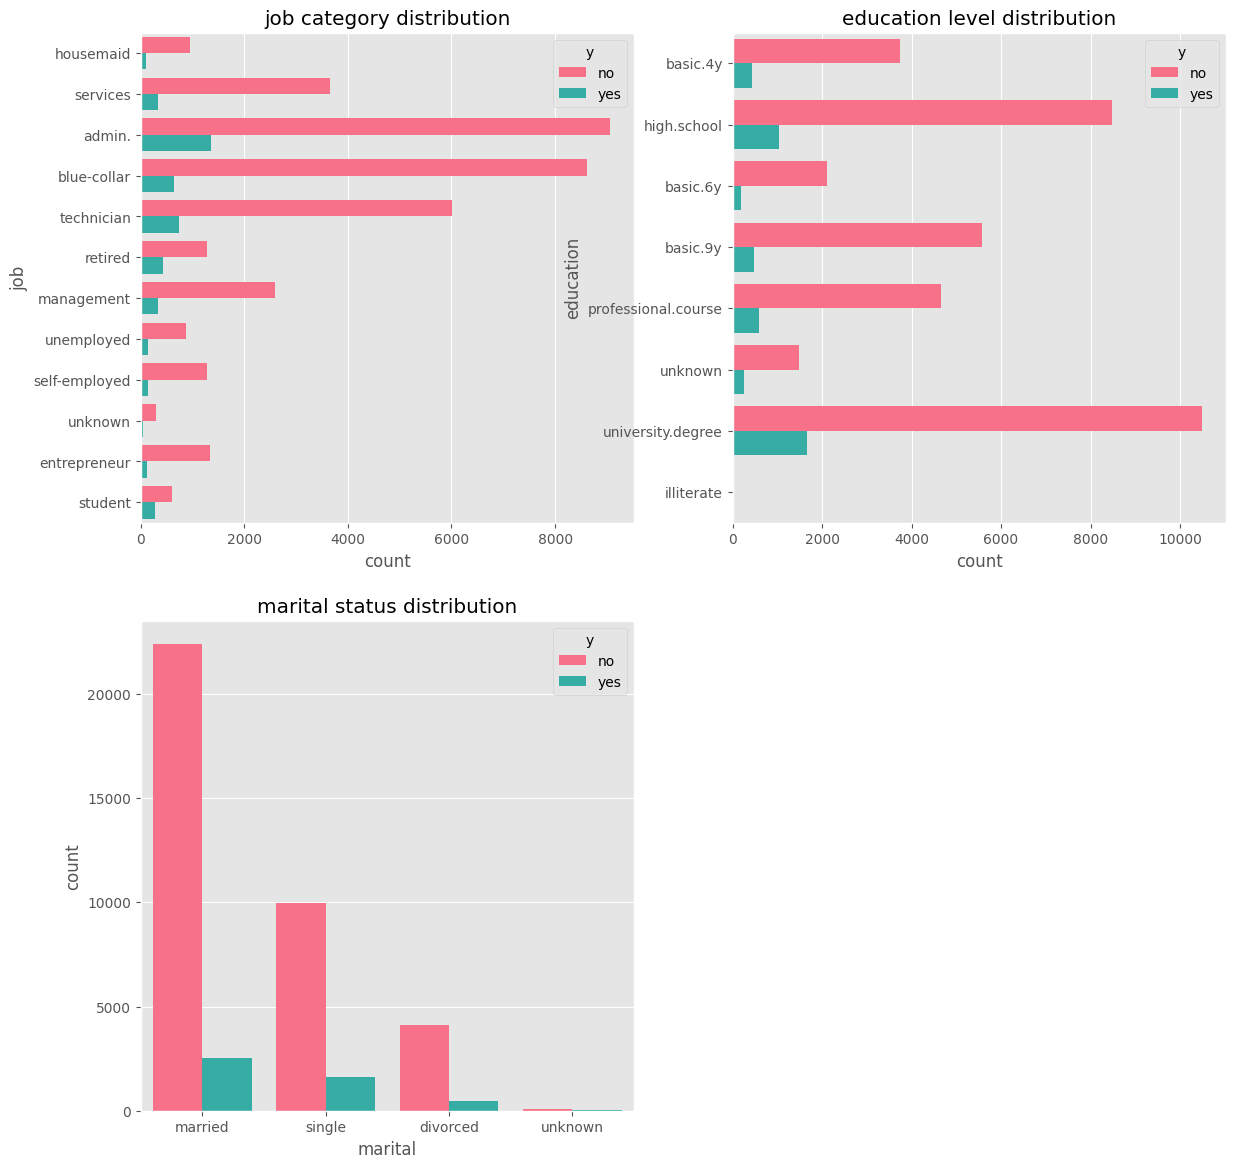

In [14]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.set_palette("husl",2)
sns.countplot(y="job", hue="y", data=data,ax=ax1,saturation=1).set_title('job category distribution')
sns.countplot(y="education", hue="y", data=data,ax=ax2,saturation=1).set_title('education level distribution')
sns.countplot(x="marital", hue="y", data=data,ax=ax3,saturation=1).set_title('marital status distribution')

the scheme can do more with young-aged people who have some basic education and have families.

### `default`, `housing`, and `loan` variables

Text(0.5, 1.0, 'personal loan distribution')

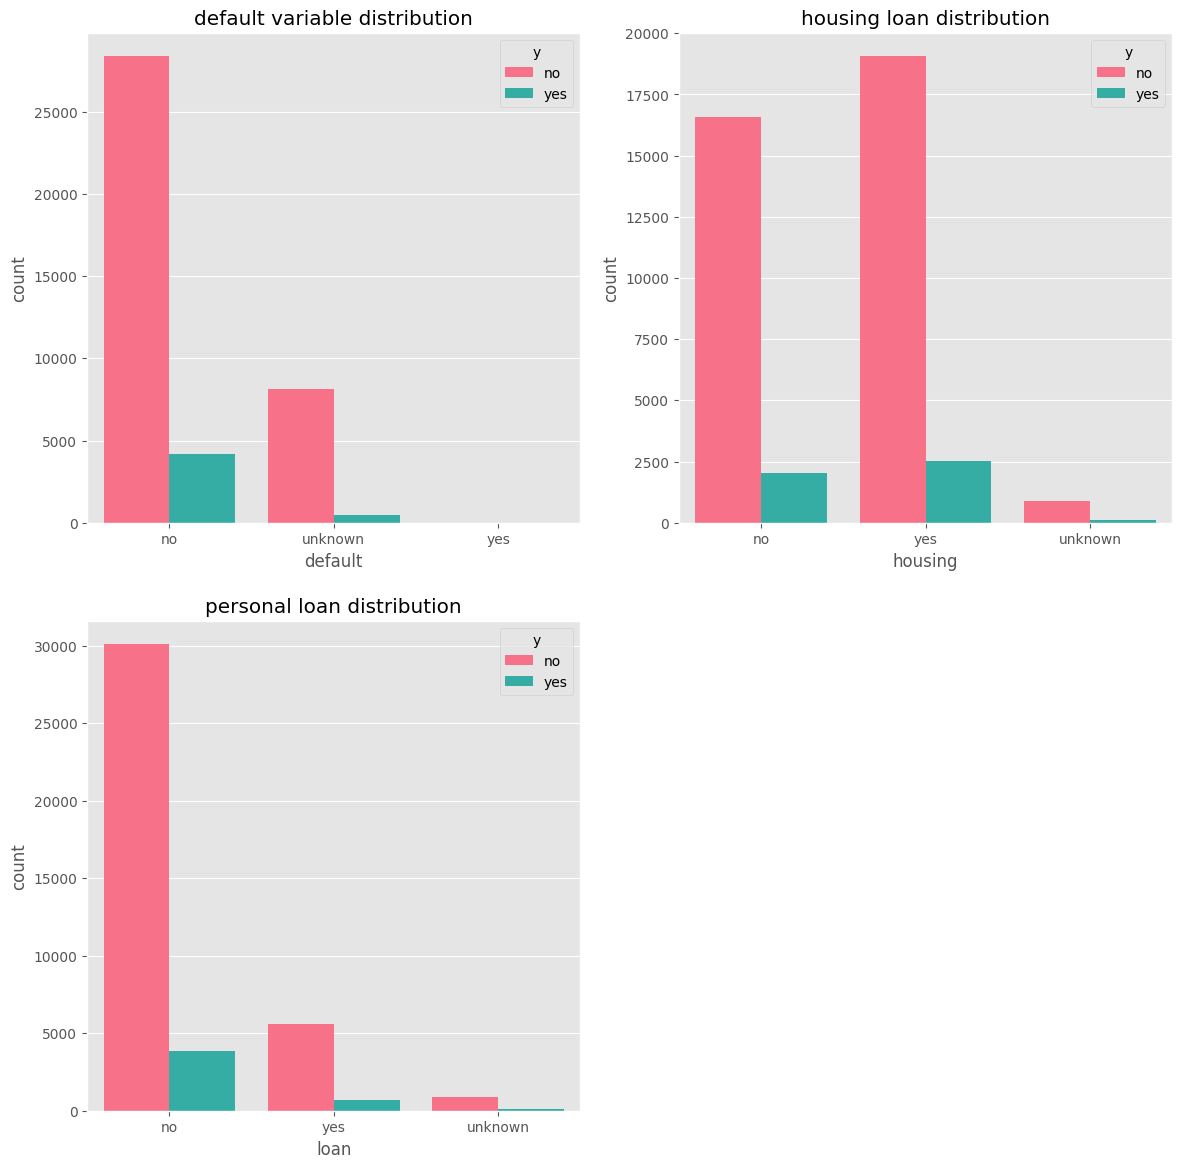

In [15]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1);ax2 = fig.add_subplot(2,2,2);ax3 = fig.add_subplot(2,2,3)

sns.countplot(x="default", hue="y", data=data,ax=ax1,saturation=1).set_title('default variable distribution')
sns.countplot(x="housing", hue="y", data=data,ax=ax2,saturation=1).set_title('housing loan distribution')
sns.countplot(x="loan", hue="y", data=data,ax=ax3,saturation=1).set_title('personal loan distribution')

Clients who have known default status have more responses, where as those with and without housing loan have equally good responses to the term deposit, with a slightly higher subscriptions among those who have a housing loan. personal loan also do have some varying patterns

## Related with the last contact of the current campaign



Text(0.5, 1.0, 'day_of_week distribution')

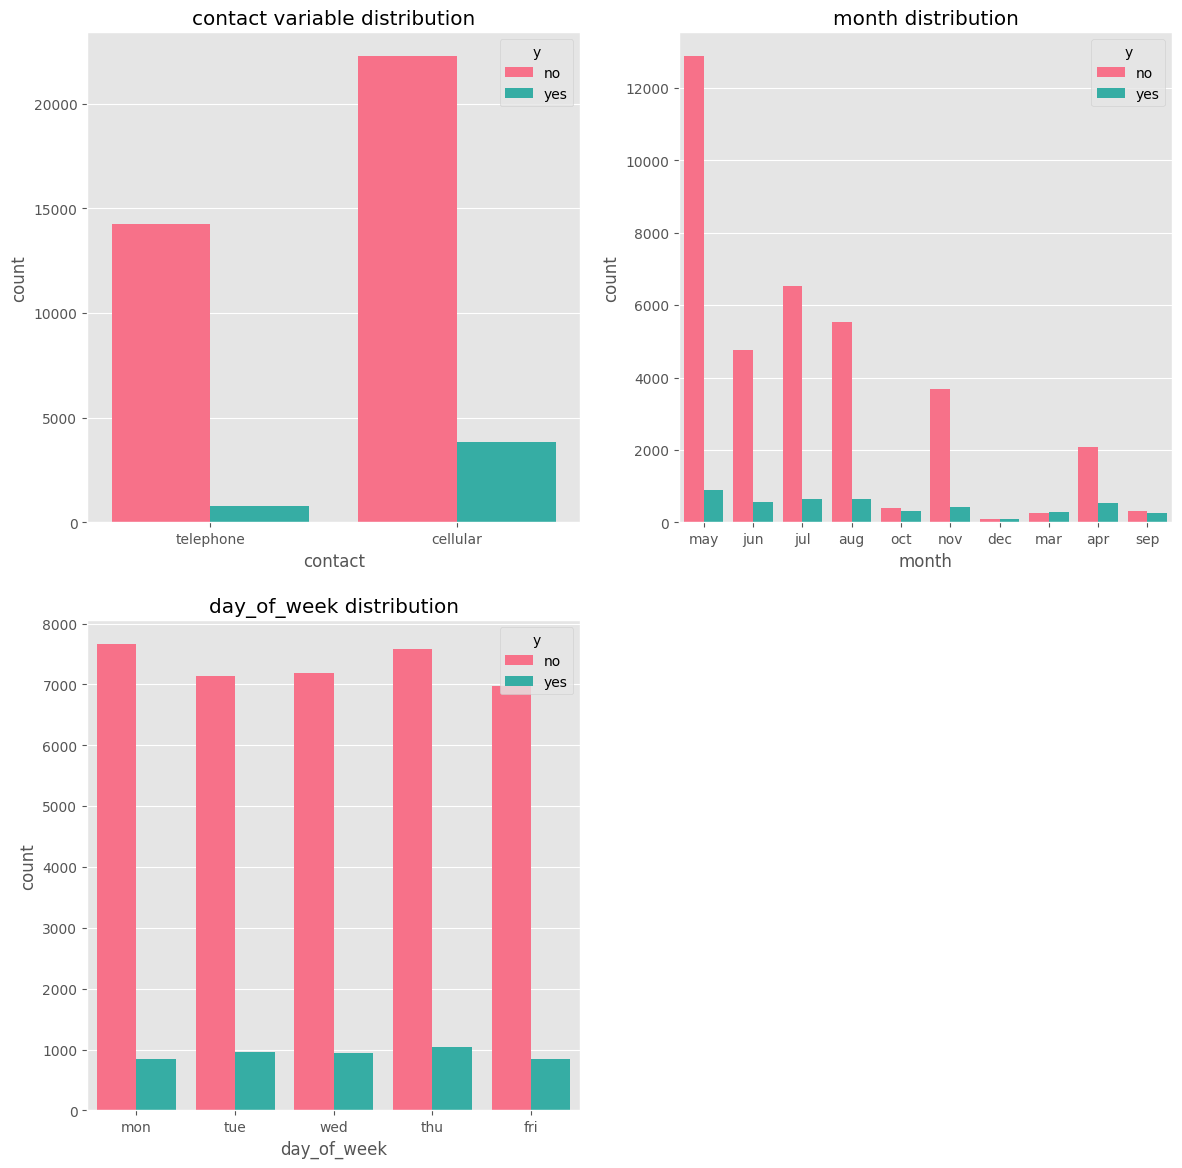

In [16]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1);ax2 = fig.add_subplot(2,2,2);ax3 = fig.add_subplot(2,2,3)

sns.countplot(x="contact", hue="y", data=data,ax=ax1,saturation=1).set_title('contact variable distribution')
sns.countplot(x="month", hue="y", data=data,ax=ax2,saturation=1).set_title('month distribution')
sns.countplot(x="day_of_week", hue="y", data=data,ax=ax3,saturation=1).set_title('day_of_week distribution')

Observe that those who were contacted over `cellular` has more responses for obvious reasons. Clients conisder more about the investments in summer months i.e April to Aug and less in winter. Observe that the `day_of_week` feature does not have much of a story to tell, i.e there are no varying patterns. Instances have pretty much the same values irrespective of the days in the week. So this variable may be excluded.

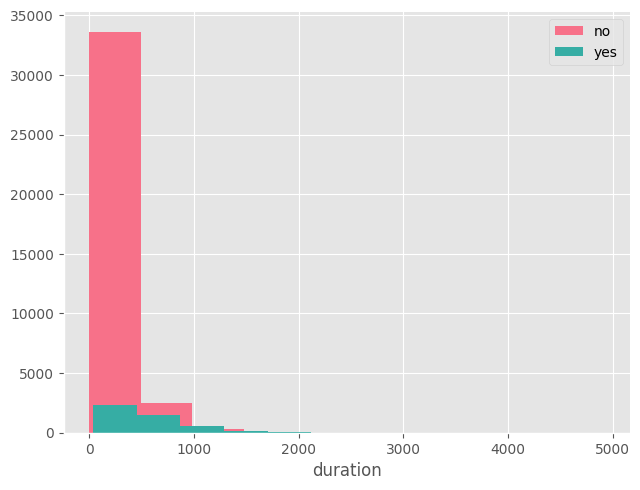

In [17]:
g = sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
g.map(plt.hist, "duration")
plt.legend()

`duration` attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

## Other attributes

campaign denotes number of contacts performed during this campaign and for this client, including last contact.

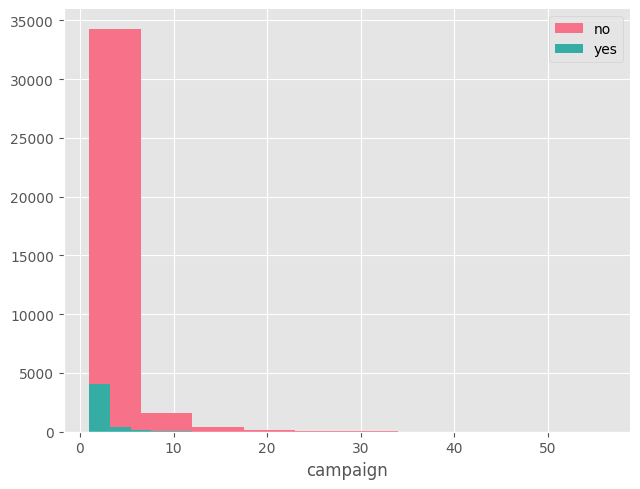

In [18]:
g = sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
g.map(plt.hist, "campaign")
plt.legend()

The variation follows pretty much the same general trend, skewed towards 'no'.

Now, `pdays` gives the number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted.

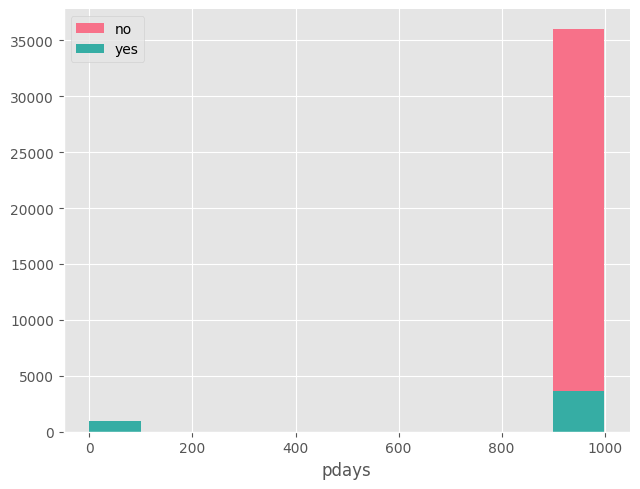

In [19]:
g = sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
g.map(plt.hist, "pdays")
plt.legend()

`previous` denotes number of contacts performed during the previous campaign and for this client.

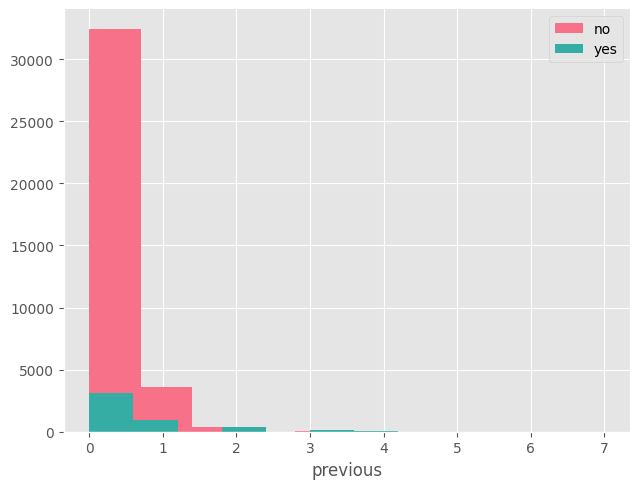

In [20]:
g = sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
g.map(plt.hist, "previous")
plt.legend()

`poutcome` denotes the outcome of the previous marketing campaign.

<Axes: xlabel='poutcome', ylabel='count'>

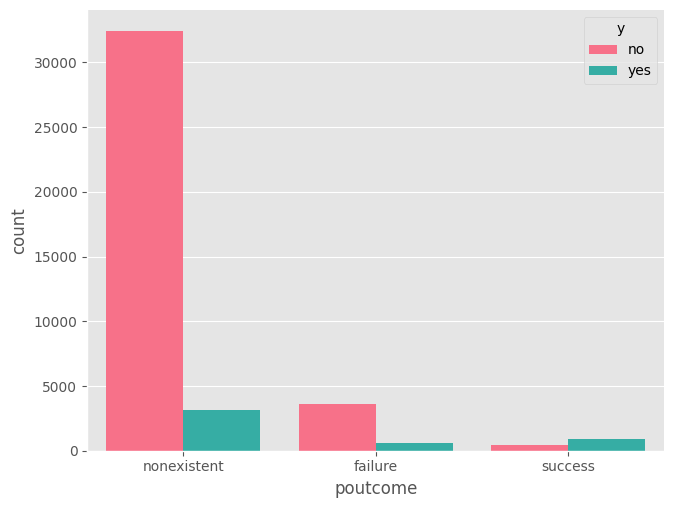

In [21]:
sns.FacetGrid(data, hue="y", height=5, aspect = 1.3)
sns.countplot(x="poutcome", hue="y",data=data, saturation=1)

All the above variables are quite intutive in determining the subscription of the term deposit. So lets include them in the model.

## Social and economic context attributes



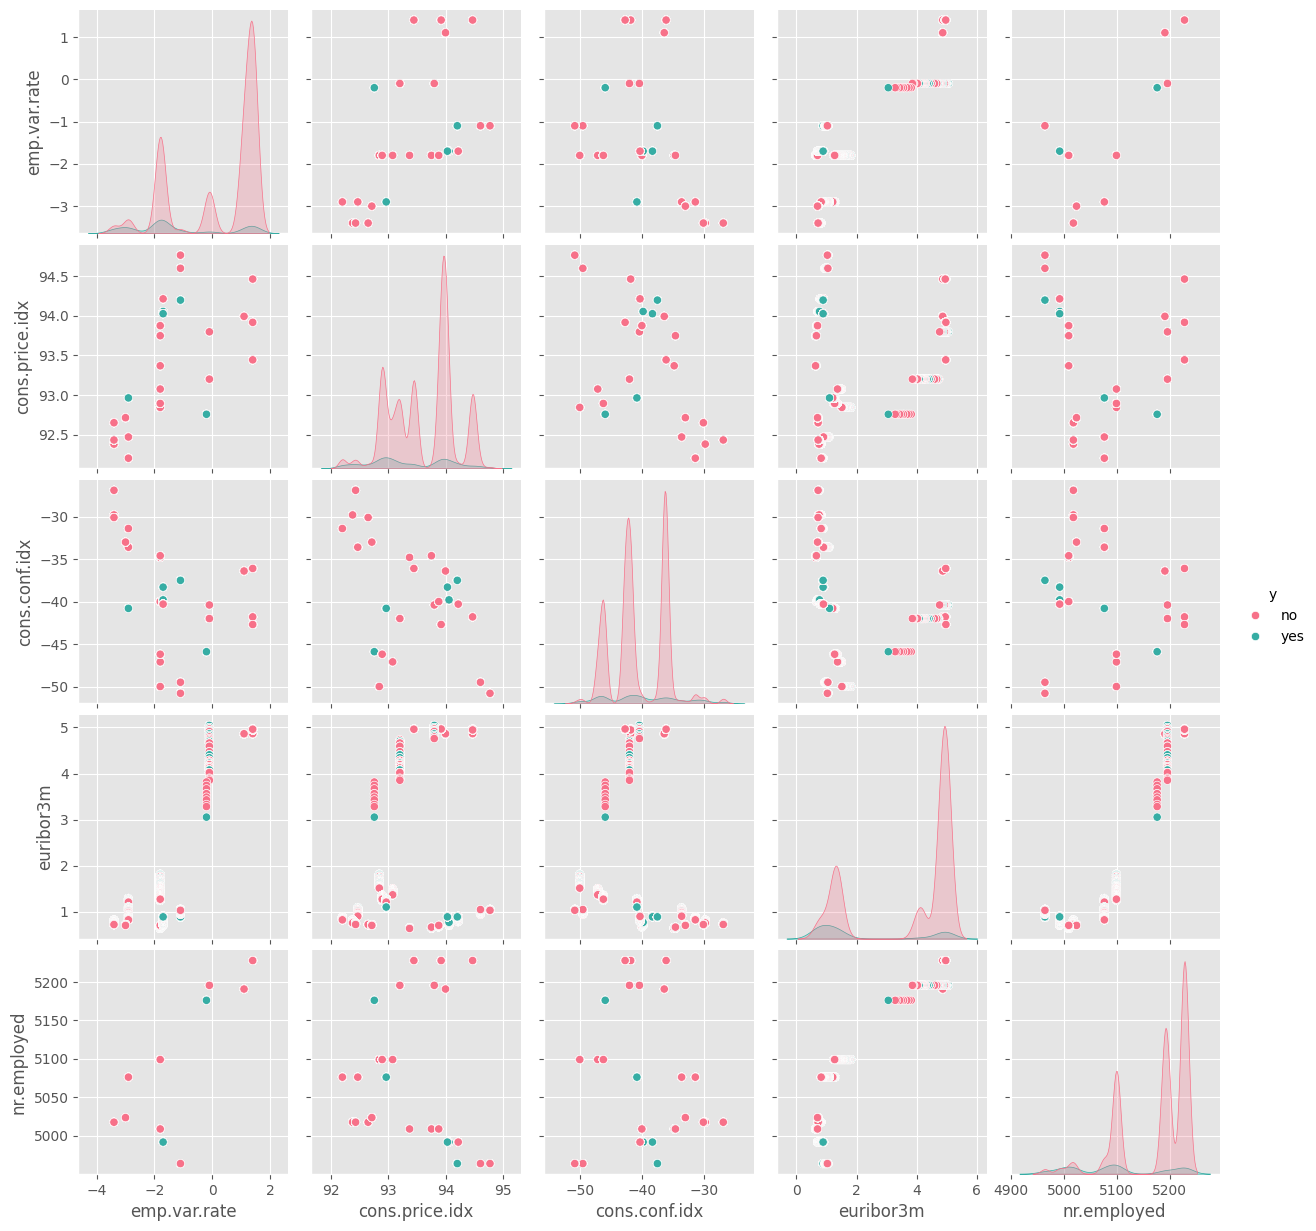

In [22]:
sns.pairplot(data, hue='y',vars =['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],palette="husl")

## Encoding categorical data

In [23]:
categ_data = data.select_dtypes(include=['object']).copy()
categ_data.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [24]:
data = pd.get_dummies(data, columns=["job", "marital", "education", "default", "contact",
                                     "housing", "loan","month","poutcome"])

In [25]:
data.head(10)

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,mon,261,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
1,57,mon,149,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
2,37,mon,226,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
3,40,mon,151,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
4,56,mon,307,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
5,45,mon,198,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
6,59,mon,139,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
7,41,mon,217,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
8,24,mon,380,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
9,25,mon,50,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   day_of_week                    41188 non-null  object 
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  object 
 12  job_admin.                     41188 non-null 

The dataset now has a total of 60 features. To prevent dummy variable class lets drop the redundant classes from all the categorical features. Also, we dont include `day_of_week` and `duration` in the model.

In [27]:
X = data.drop(['day_of_week','duration','y','job_unknown','marital_unknown',
               'education_illiterate','default_yes','housing_unknown','loan_unknown',
               'month_dec','poutcome_nonexistent'], axis = 1)
y = data['y']

## Splitting into training and test set

Lets do the split in the ratio 80:20

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Dimensionality Reduction : Principal Component Analysis

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [31]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.11230071, 0.05882898])

## Machine Learning : Model Building

### Logistic Regression

In [32]:

from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(class_weight = 'balanced',random_state = 0)
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred)
cm_logit

array([[5163, 2156],
       [ 277,  642]])

In [33]:
classifier1.score(X_test,y_test)

0.7046613255644574

### Support Vector Machines

In [34]:

from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0, class_weight='balanced')
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)


from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
cm_svm

array([[5137, 2182],
       [ 274,  645]])

Lets calculate the accuracy metric for SVM (Linear)

In [35]:
classifier2.score(X_test,y_test)

0.701869385773246

In [36]:

from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0,class_weight='balanced')
classifier3.fit(X_train, y_train)


y_pred = classifier3.predict(X_test)


from sklearn.metrics import confusion_matrix
cm_KSVM = confusion_matrix(y_test, y_pred)
cm_KSVM

array([[5313, 2006],
       [ 294,  625]])

In [37]:
classifier3.score(X_test,y_test)

0.720806020878854

### Ensemble methods



In [38]:

from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,class_weight = 'balanced')
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, y_pred)
cm_dtree

array([[6646,  673],
       [ 648,  271]])

In [39]:
classifier4.score(X_test,y_test)

0.8396455450352027

In [40]:

from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0,class_weight = 'balanced')
classifier5.fit(X_train, y_train)


y_pred = classifier5.predict(X_test)


from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred)
cm_RF

array([[7068,  251],
       [ 712,  207]])

In [41]:
classifier5.score(X_test,y_test)

0.883102694828842